# Modelos e Estratégias de Trading
## Comportamento do Retorno dos Ativos

Uirá Caiado. 07 de Agosto, 2016

**Resumo**

*Bla bla.*

## 1. Introdução

Nesta sessão vamos ...




## 2. Estatísticas de Retornos Financeiros

Nesta primeira parte o objetivo é estudar as características estatísticas das distribuições de retornos logarítmicos de cinco diferentes índices de ações. 





In [23]:
from pandas_datareader import data, wb
import pandas as pd
import datetime
import numpy as np

In [43]:
# recupera dados do yahoo
# NOTE: nem o yahoo e nem o google finance voltam dados do FTAS
d_data = {}
l_names = ["S&P 500", "DAX", "Nikkey 225", "Ibovespa"]
l_codes = ['^GSPC','^GDAXI', '^N225', '^BVSP']
ts_start = datetime.datetime(1980, 1, 1)
ts_end = datetime.datetime(2016, 8, 8)
for s_key, s_name in zip(l_codes, l_names):  #, '^FTAS']:
    df = data.get_data_yahoo(s_key, ts_start, ts_end)
    # guarda apenas preco ajustado em dicionario
    d_data[s_key[1:]] = df['Adj Close']
    print u"a prinmeira data do {} é {:%d/%m/%Y}".format(s_name, df.index[0])

a prinmeira data do S&P 500 é 02/01/1980
a prinmeira data do DAX é 26/11/1990
a prinmeira data do Nikkey 225 é 04/01/1984
a prinmeira data do Ibovespa é 27/04/1993


In [123]:
# coloca todas as bases para comecar na mesma data
df_prices = pd.DataFrame(d_data)
df_prices.dropna(inplace=True)
df_prices.head()

,BVSP,GDAXI,GSPC,N225
Date,,,,
1993-04-27,24.500000,1640.800049,438.010010,20207.0
1993-04-28,24.299999,1628.900024,438.019989,20455.0
1993-04-30,24.100000,1627.199951,440.190002,20919.0
1993-05-06,25.600000,1623.300049,443.260010,20622.0
1993-05-07,25.799999,1611.900024,442.309998,20811.0


In [ ]:
def calc_stats(df):
    '''
    Return a dictionary with the median, mean, std deviation,
    minimum value, maximum value, skewness, kurtosis, MAD
    and IQR
    :param df: dataframe. time series of log-returns of
        different assets
    '''
    d_rtn = {}
    # Panda's std() method uses degrees of freedom of 1 by default
    d_rtn['Count'] = df.count().to_dict()
    d_rtn['Median'] = df.median().to_dict()
    d_rtn['Mean'] = df.mean().to_dict()
    d_rtn['StdDev'] = df.std(ddof=0).to_dict()
    d_rtn['Min'] = df.min().to_dict()
    d_rtn['Max'] = df.max().to_dict()
    d_rtn['Skew'] = df.max().to_dict()
    d_rtn['Kutosis'] = df.max().to_dict()
    d_rtn['MAD'] = df.mad()    
    d_rtn['IQR'] = df.quantile(0.75) - df.quantile(0.25)
    
    df_rtn = pd.DataFrame(d_rtn).T
    l_idx = ['Count', 'Median', 'Mean', 'StdDev', 'Min', 'Max',
             'Skew', 'Kutosis', 'MAD', 'IQR']
    return df_rtn.ix[l_idx, :]
    

In [227]:
# calcula estatisticas 
l_name = ['daily', 'weekly', 'monthly', 'yearly']
d_logrtn = {}
d_logrtn_all = {}
df_rtn = None
for s_frq, s_name in zip(['1D', 'W-FRI', '1M', 'A'], l_name):
    # modifica frequencia dos dados e calcula log retornos
    df_aux = df_prices.resample(s_frq).last()
    df_aux = np.log(df_aux/df_aux.shift()).dropna()
    
    # calcula estatisticas e guarda resultados na mesma estrutura
    df_test = calc_stats(df_aux)
    df_iqr = df_test.ix['IQR', :]
    l_idx = df_test.index
    df_test.index = [[s_name] * len(l_idx), df_test.index]    
    if s_frq == '1D':
        df_rtn = df_test.copy()
    else:
        df_rtn = pd.concat([df_rtn, df_test])
    #guarda dados sem outliers (1.5 * IQR)
    l_no_out_liers = ((df_aux <= df_aux.quantile(0.75) + 1.5 * df_iqr) & 
                      (df_aux >= df_aux.quantile(0.25) - 1.5 * df_iqr)).sum(axis=1)==4
    d_logrtn_all[s_name] = df_aux
    d_logrtn[s_name] = df_aux[l_no_out_liers]

In [228]:
# imprime resultados
df_rtn

BVSP        GDAXI         GSPC         N225
daily   Count    3894.000000  3894.000000  3894.000000  3894.000000
        Median      0.001390     0.000794     0.000672     0.000199
        Mean        0.001505     0.000128     0.000303    -0.000123
        StdDev      0.022425     0.014367     0.011387     0.014545
        Min        -0.172082    -0.072703    -0.094695    -0.121110
        Max         0.228116     0.106851     0.102457     0.094941
        Skew        0.228116     0.106851     0.102457     0.094941
        Kutosis     0.228116     0.106851     0.102457     0.094941
        MAD         0.015733     0.010294     0.007820     0.010490
        IQR         0.023104     0.014675     0.010690     0.015791
weekly  Count    1215.000000  1215.000000  1215.000000  1215.000000
        Median      0.006228     0.004855     0.002732     0.001457
        Mean        0.006403     0.001529     0.001317    -0.000188
        StdDev      0.051719     0.031515     0.023419     0.030472
        Min        -0.293351    -0.243470    -0.200838    -0.278844
        Max         0.351918     0.149422     0.113559     0.114497
        Skew        0.351918     0.149422     0.113559     0.114497
        Kutosis     0.351918     0.149422     0.113559     0.114497
        MAD         0.036086     0.022992     0.016543     0.022953
        IQR         0.051884     0.035218     0.024039     0.036751
monthly Count     280.000000   280.000000   280.000000   280.000000
        Median      0.018170     0.013817     0.011129     0.003091
        Mean        0.027785     0.006636     0.005715    -0.000815
        StdDev      0.119277     0.062481     0.042367     0.058690
        Min        -0.503413    -0.293327    -0.185636    -0.272162
        Max         0.679202     0.193738     0.102307     0.149670
        Skew        0.679202     0.193738     0.102307     0.149670
        Kutosis     0.679202     0.193738     0.102307     0.149670
        MAD         0.081331     0.046407     0.031836     0.045697
        IQR         0.110263     0.072379     0.051284     0.073784
yearly  Count      23.000000    23.000000    23.000000    23.000000
        Median      0.071361     0.148937     0.104701     0.006057
        Mean        0.218853     0.066373     0.066854    -0.001957
        StdDev      0.587839     0.244735     0.184797     0.231809
        Min        -0.531427    -0.578790    -0.506836    -0.546864
        Max         2.450569     0.380047     0.286424     0.449290
        Skew        2.450569     0.380047     0.286424     0.449290
        Kutosis     2.450569     0.380047     0.286424     0.449290
        MAD         0.392026     0.189889     0.137394     0.187660
        IQR         0.496135     0.291104     0.220844     0.315518

In [256]:
df_plot = None
for s_name in l_name:
    df_aux = d_logrtn[s_name].copy()
    df_aux.index = [[s_name] * len(df_aux.index), df_aux.index]
    if s_frq == '1D':
        df_plot = df_aux.copy()
    else:
        df_plot = pd.concat([df_plot, df_aux])

In [257]:
df_plot = df_plot.stack().reset_index()
df_plot.columns = ['Freq', 'Date', 'Index', 'Return']

In [258]:
df_plot.head()

,Freq,Date,Index,Return
0,daily,1993-04-28,BVSP,-0.008197
1,daily,1993-04-28,GDAXI,-0.007279
2,daily,1993-04-28,GSPC,0.000023
3,daily,1993-04-28,N225,0.012198
4,daily,1993-05-07,BVSP,0.007782


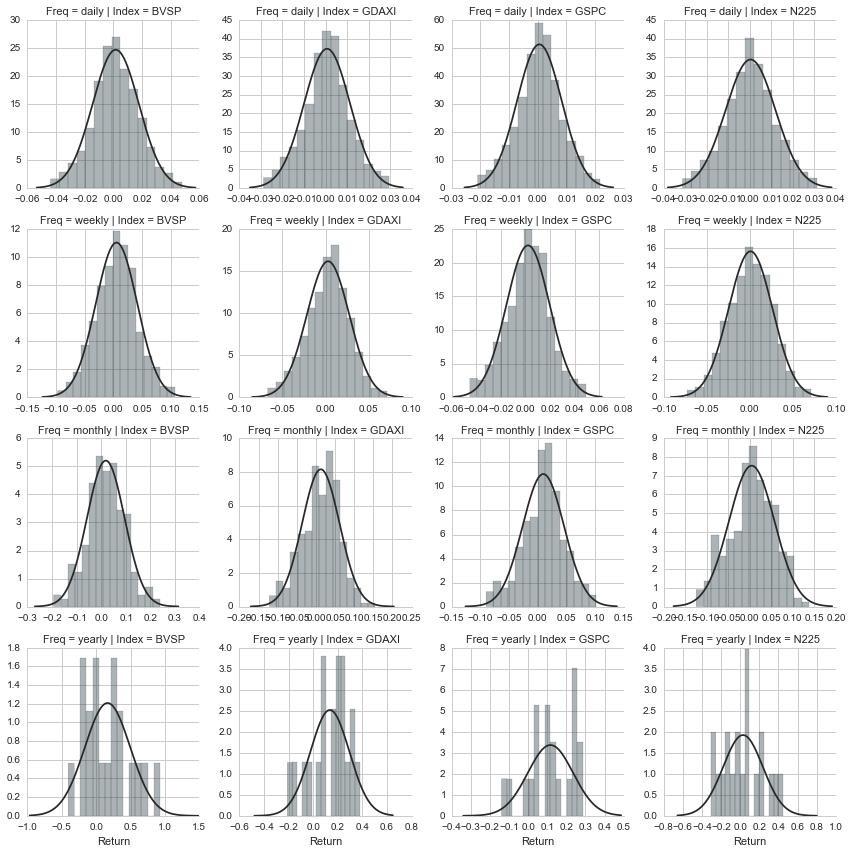

In [259]:
import matplotlib.pyplot as plt
from scipy import stats
# pltando dados sem out-liers
g = sns.FacetGrid(df_plot, col="Index",
                  row='Freq', sharex=False,
                  sharey=False)
g.map(sns.distplot, "Return", bins=15, kde=False,
      fit=stats.norm);

In [260]:
from scipy import stats
df_jarque_bera = df_plot.groupby(['Freq', 'Index']).aggregate(stats.jarque_bera)
pd.DataFrame([[x[0][1]] for x in df_jarque_bera.values], index=df_jarque_bera.index,
             columns=['p-value'])

p-value
Freq    Index          
daily   BVSP   0.827902
        GDAXI  0.041758
        GSPC   0.029428
        N225   0.559243
monthly BVSP   0.983525
        GDAXI  0.194519
        GSPC   0.143611
        N225   0.153363
weekly  BVSP   0.998951
        GDAXI  0.011183
        GSPC   0.174028
        N225   0.117950
yearly  BVSP   0.630335
        GDAXI  0.453847
        GSPC   0.620602
        N225   0.714038

he null hypothesis is that the distribution is normal, that both the skewness and excess kurtosis equal zero, or alternatively, that the skewness is zero and the regular run-of-the-mill kurtosis is three.

## 3. Replicação do Índice Bovespa

Nesta segunda parte o objetivo é praticar a agregação transversal de retornos financeiros através da replicação de um índice de ações. Neste caso o objetivo é a replicação do Índice Bovespa (IBOV) através dos retornos individuais das ações compõem o índice.

## 4. Conclusão

Bla bla bla.  

## 5. Últimas Considerações

Bla bla bla. 

*Style notebook and change matplotlib defaults*

In [128]:
#loading style sheet
from IPython.core.display import HTML
HTML(open('ipython_style.css').read())

In [2]:
#changing matplotlib defaults
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("PuBuGn_d", 10))